In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.models import Phrases
from gensim.corpora import Dictionary
import nltk
import os

# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/norika_machome/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
df_final = pd.read_csv("../data/csv/df_final.csv")
df_final.head()

,paperId,docType,keywords,keywordsPlus,subjectSub1,subjectCat1,subjectCatExt,categoryHeading,abstract,year,...,title,country,location,orgNames,orgEnhanced1,orgEnhancedAll,fullName,researcherId,authorSeq,firstAuthorSource
0,WOS:000400551000003,Article,"computational materials science,nanostructures...",NaN,Technology,"Materials Science, Multidisciplinary",Materials Science,Science & Technology,Nanomaterial-based ultra-low-energy device des...,2016,...,Towards quantum dot and device implementation ...,India,NaN,West Bengal Univ Technol,Maulana Abul Kalam Azad University of Technology,Maulana Abul Kalam Azad University of Technology,"Purkayastha, Tamoghna",FSQ-0224-2022,1,seq1_unique
1,WOS:000400701200001,Article,NaN,NaN,Physical Sciences,"Physics, Applied",Physics,Science & Technology,A challenge for constructing large circuits of...,2016,...,Universal Gate for Fixed-Frequency Qubits via ...,USA,AP,IBM TJ Watson Res Ctr,International Business Machines (IBM),International Business Machines (IBM);IBM USA,"McKay, David C.",GWM-2403-2022,1,seq1_unique
2,WOS:000399549500014,Article,NaN,"PASTA-ULAM PROBLEM,1-F NOISE,THERMAL AGITATION...",Technology,"Computer Science, Theory & Methods","Computer Science,Instruments & Instrumentation...",Science & Technology,Fluctuations with 1/f spectrum stand for the f...,2016,...,On the 1/f Noise and Energy Partition in Solid,Romania,AC,IMT Bucharest,National Institute Research & Development Micr...,National Institute Research & Development Micr...,"Mihaila, M.",FKV-4690-2022,1,seq1_unique
3,WOS:000397944800010,Article,"Quantum Key Distribution,Bell States,Quantum C...","PRIVACY AMPLIFICATION,CRYPTOGRAPHY,INFORMATION...",Technology,"Computer Science, Information Systems",Computer Science,Science & Technology,A quantum key distribution protocol with tradi...,2016,...,Semi-quantum Key Distribution Protocol Based o...,Peoples R China,AC,Shenzhen Univ,Shenzhen University,Shenzhen University,"Wang, Ting",JUD-9931-2023,1,seq1_unique
4,WOS:000398221800009,Article,"quantum cryptography,authentication,key distri...",NaN,Technology,"Computer Science, Information Systems","Computer Science,Telecommunications",Science & Technology,"In this paper, we review a previous research p...",2016,...,Upgrade of a quantum scheme for authentication...,Tunisia,NaN,Natl Engn Sch Tunis,Universite de Tunis-El-Manar,Universite de Tunis-El-Manar;Ecole Nationale d...,"Ghilen, Aymen",GAU-3999-2022,1,seq1_unique


Publications per year:
 year
2007     598
2008     621
2009     809
2010     797
2011     831
2012     903
2013     989
2014    1185
2015    1298
2016    1540
2017    1557
2018    1826
2019    2223
2020    2715
2021    3066
2022    3571
2023    3504
Name: count, dtype: int64


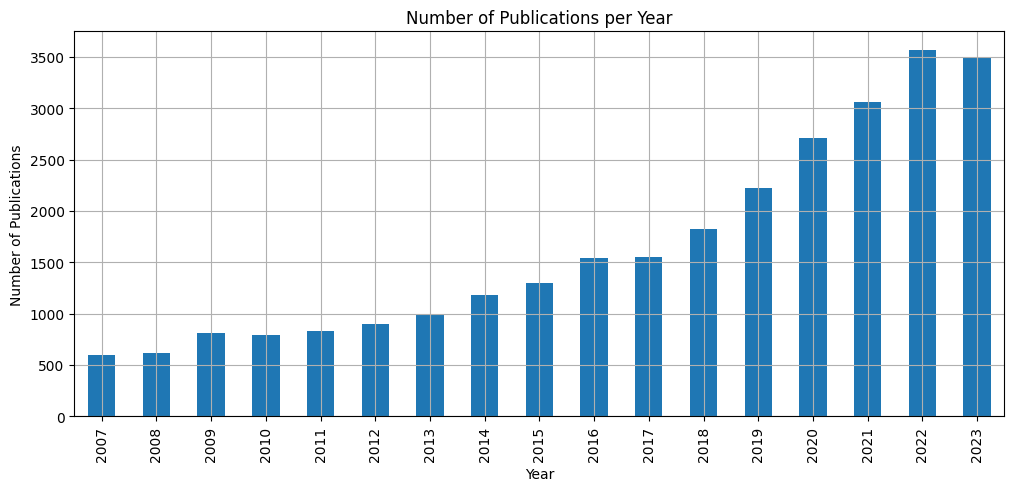

Abstract length stats:
 count    28033.000000
mean       156.802483
std         57.680272
min          1.000000
25%        119.000000
50%        150.000000
75%        188.000000
max       1219.000000
Name: abstract_word_count, dtype: float64


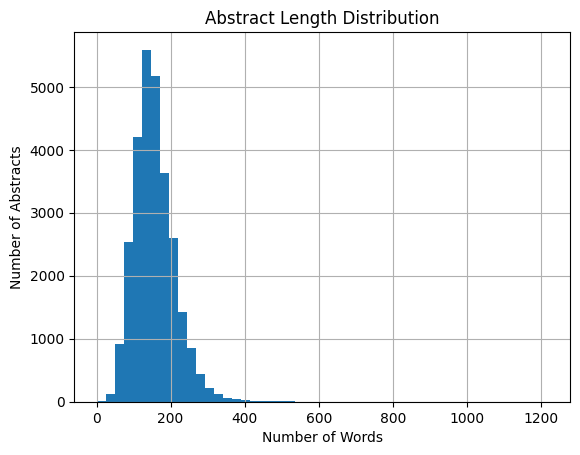

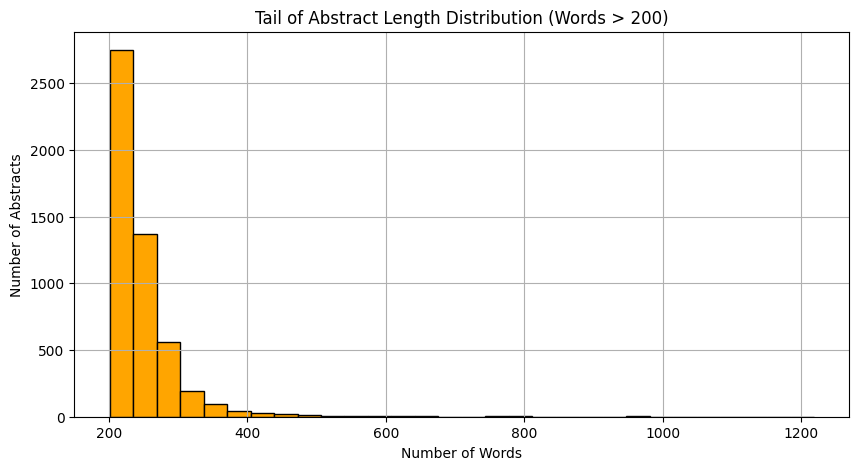

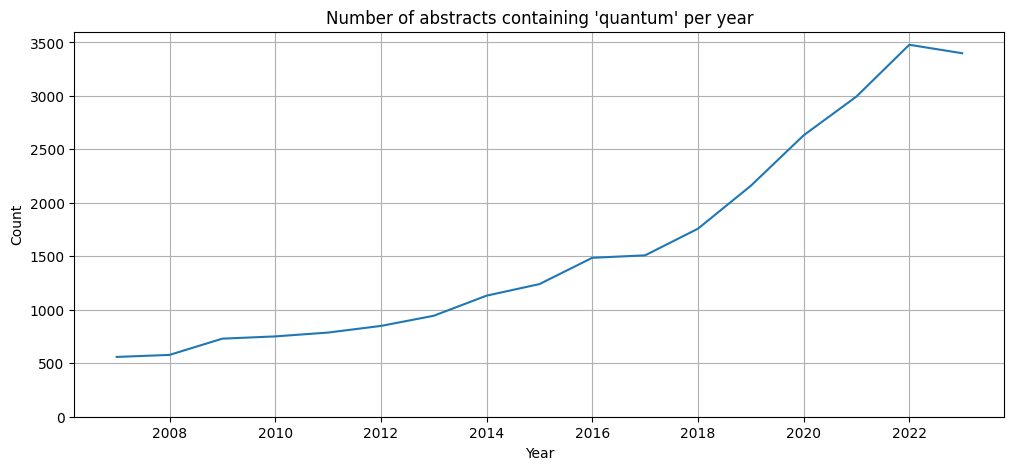

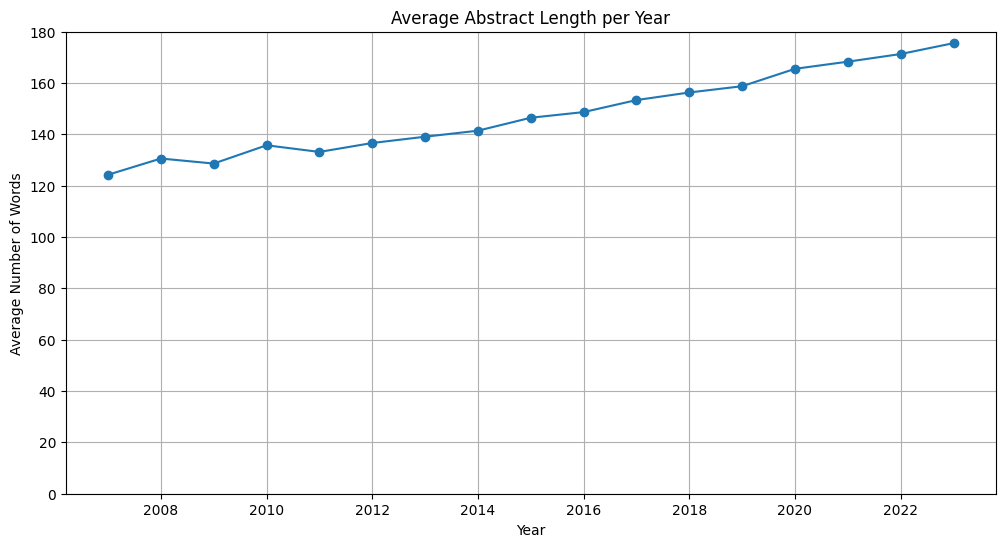

In [39]:
# ---------- Raw text analyses ----------

# Number of publications per year
pubs_per_year = df_final['year'].value_counts().sort_index()
print("Publications per year:\n", pubs_per_year)

pubs_per_year.plot(kind='bar', figsize=(12,5))
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

# Abstract length stats (raw text)
df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))
print("Abstract length stats:\n", df_final['abstract_word_count'].describe())

df_final['abstract_word_count'].hist(bins=50)
plt.title('Abstract Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Number of Abstracts')
plt.grid(True)
plt.show()

# Filter only long abstracts (e.g., >200 words)
long_abstracts = df_final[df_final['abstract_word_count'] > 200]

# Plot histogram for the tail
plt.figure(figsize=(10, 5))
long_abstracts['abstract_word_count'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Tail of Abstract Length Distribution (Words > 200)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Abstracts')
plt.grid(True)
plt.show()


# Keyword frequency over years (raw text)
keyword = 'quantum'
df_final['contains_keyword'] = df_final['abstract'].str.contains(keyword, case=False, na=False)
keyword_counts = df_final.groupby('year')['contains_keyword'].sum()

keyword_counts.plot(figsize=(12,5))
plt.title(f"Number of abstracts containing '{keyword}' per year")
plt.xlabel('Year')
plt.ylim(0,3600)
plt.ylabel('Count')
plt.grid(True)
plt.show()

df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))

# Calculate average abstract length per year
avg_length_per_year = df_final.groupby('year')['abstract_word_count'].mean()
# Plot
plt.figure(figsize=(12, 6))
avg_length_per_year.plot(marker='o')
plt.title('Average Abstract Length per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Words')
plt.ylim(0,180)
plt.grid(True)
plt.show()


In [ ]:
# Filter abstracts with more than 500 words
over_500 = df_final[df_final['abstract_word_count'] > 500]

print(f"Number of abstracts over 500 words: {len(over_500)}")
print("Stats for abstracts > 500 words:\n", over_500['abstract_word_count'].describe())

output_folder = '../data/csv'
csv_path = os.path.join(output_folder, "df_outlier.csv")
over_500.to_csv(csv_path, index=False)

Number of abstracts over 500 words: 28
Stats for abstracts > 500 words:
 count      28.000000
mean      685.714286
std       182.587748
min       502.000000
25%       539.750000
50%       638.500000
75%       779.000000
max      1219.000000
Name: abstract_word_count, dtype: float64



Dropped 28 abstracts longer than 500 words out of 28033 total abstracts.
Remaining abstracts: 28005

Publications per year:
 year
2007     598
2008     619
2009     808
2010     796
2011     830
2012     903
2013     989
2014    1183
2015    1298
2016    1540
2017    1556
2018    1825
2019    2222
2020    2714
2021    3064
2022    3568
2023    3492
Name: count, dtype: int64


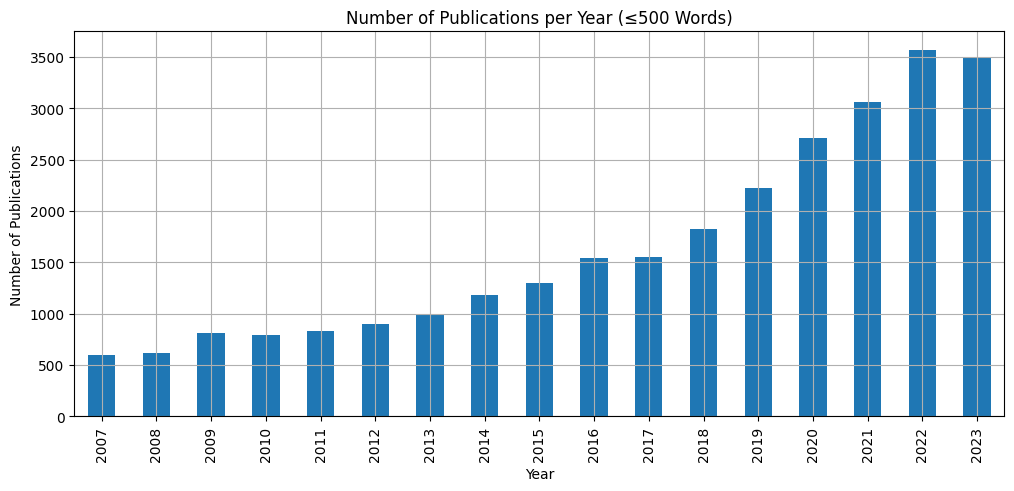


Abstract length stats (≤500 words):
 count    28005.000000
mean       156.273665
std         54.938237
min          1.000000
25%        119.000000
50%        150.000000
75%        187.000000
max        499.000000
Name: abstract_word_count, dtype: float64


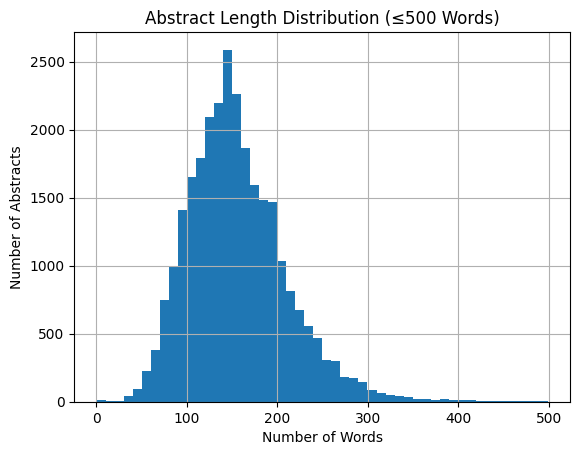

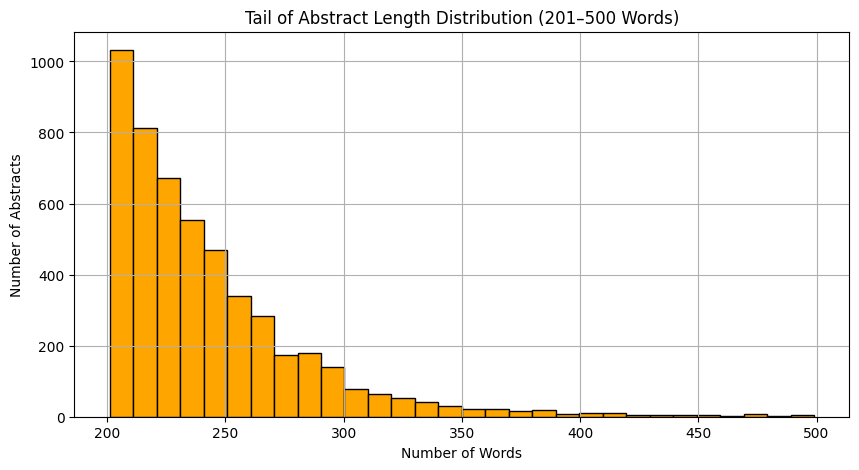

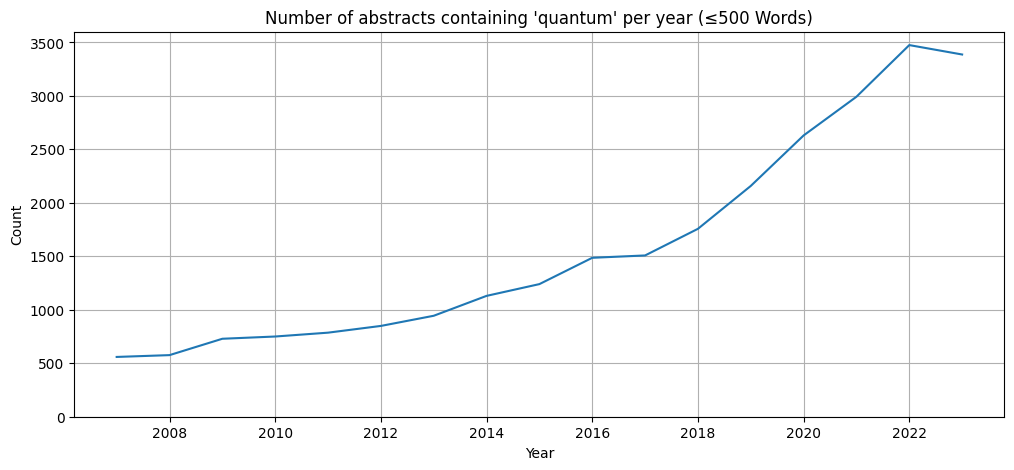

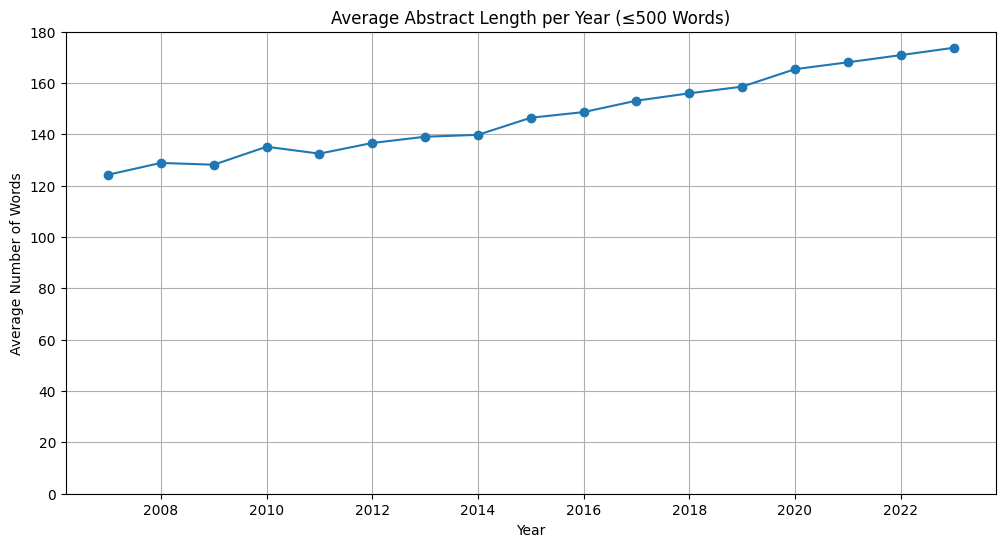

In [41]:
# Recalculate word counts (if needed)
df_final['abstract_word_count'] = df_final['abstract'].apply(lambda x: len(str(x).split()))

# Count and drop abstracts > 500 words
num_total = len(df_final)
df_clean = df_final[df_final['abstract_word_count'] <= 500].copy()

csv_path = os.path.join(output_folder, "df_clean.csv")
df_clean.to_csv(csv_path, index=False)


num_dropped = num_total - len(df_clean)

print(f"\nDropped {num_dropped} abstracts longer than 500 words out of {num_total} total abstracts.")
print(f"Remaining abstracts: {len(df_clean)}")

# 1. Publications per year
pubs_per_year = df_clean['year'].value_counts().sort_index()
print("\nPublications per year:\n", pubs_per_year)

pubs_per_year.plot(kind='bar', figsize=(12, 5))
plt.title('Number of Publications per Year (≤500 Words)')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

# 2. Abstract length stats (cleaned)
print("\nAbstract length stats (≤500 words):\n", df_clean['abstract_word_count'].describe())

df_clean['abstract_word_count'].hist(bins=50)
plt.title('Abstract Length Distribution (≤500 Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Abstracts')
plt.grid(True)
plt.show()

# 3. Tail plot (201–500 words)
tail_abstracts = df_clean[df_clean['abstract_word_count'] > 200]

plt.figure(figsize=(10, 5))
tail_abstracts['abstract_word_count'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Tail of Abstract Length Distribution (201–500 Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Abstracts')
plt.grid(True)
plt.show()

# 4. Keyword frequency over years
keyword = 'quantum'
df_clean['contains_keyword'] = df_clean['abstract'].str.contains(keyword, case=False, na=False)
keyword_counts = df_clean.groupby('year')['contains_keyword'].sum()

keyword_counts.plot(figsize=(12, 5))
plt.title(f"Number of abstracts containing '{keyword}' per year (≤500 Words)")
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0, 3600)
plt.grid(True)
plt.show()

# 5. Average abstract length per year
avg_length_per_year = df_clean.groupby('year')['abstract_word_count'].mean()

plt.figure(figsize=(12, 6))
avg_length_per_year.plot(marker='o')
plt.title('Average Abstract Length per Year (≤500 Words)')
plt.xlabel('Year')
plt.ylabel('Average Number of Words')
plt.grid(True)
plt.ylim(0, 180)
plt.show()



In [35]:
df_final = df_clean
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if pd.isna(text):
        return []
    tokens = tokenizer.tokenize(text.lower())
    tokens = [t for t in tokens if not t.isnumeric()]       # Remove pure numbers
    tokens = [t for t in tokens if len(t) > 1]              # Remove 1-char tokens
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return tokens

# Preprocess each abstract as one document
docs = df_final['abstract'].apply(preprocess).tolist()

# Build bigrams model (with min_count=20)
bigram = Phrases(docs, min_count= 5, threshold=10)

# Append bigrams to documents
docs_with_bigrams = []
for doc in docs:
    bigrams_in_doc = [token for token in bigram[doc] if '_' in token]
    docs_with_bigrams.append(doc + bigrams_in_doc)

# Build trigram model (min_count and threshold can be tuned)
trigram = Phrases(docs_with_bigrams, min_count= 5, threshold=10)

# Append trigrams to documents
docs_with_trigrams = []
for doc in docs_with_bigrams:
    trigrams_in_doc = [token for token in trigram[doc] if '_' in token]
    docs_with_trigrams.append(doc + trigrams_in_doc)

# Create dictionary and filter extremes (remove tokens appearing <20 docs)
dictionary = Dictionary(docs_with_trigrams)
# dictionary.filter_extremes(no_below=20, no_above = 0.3) #no_above <- I remove this

# Create bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in docs_with_trigrams]

print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")



Number of unique tokens: 52595
Number of documents: 28005


Average unique tokens per abstract per year:
 year
2007    65.254181
2008    66.390953
2009    67.066832
2010    70.489950
2011    69.702410
2012    71.771872
2013    73.140546
2014    73.153001
2015    76.489985
2016    78.003896
2017    80.058483
2018    81.762740
2019    83.103510
2020    86.265660
2021    87.474869
2022    88.435258
2023    90.391753
Name: unique_tokens_count, dtype: float64


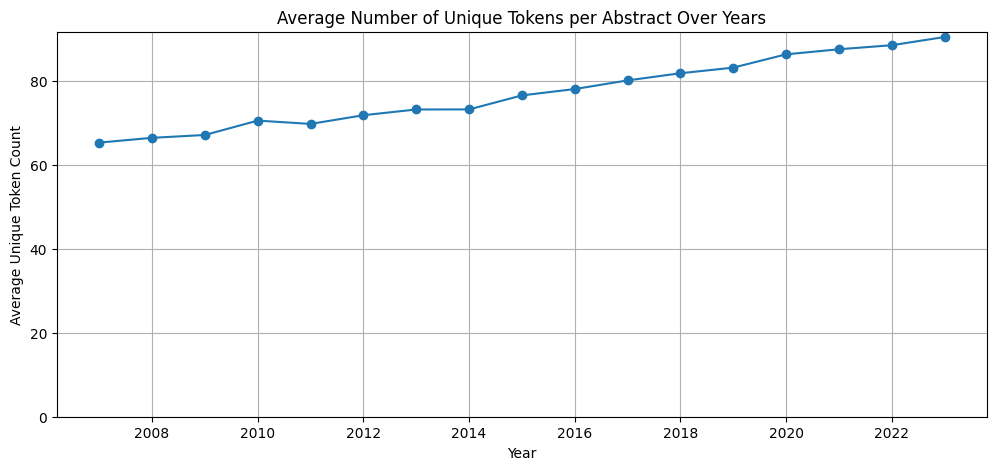

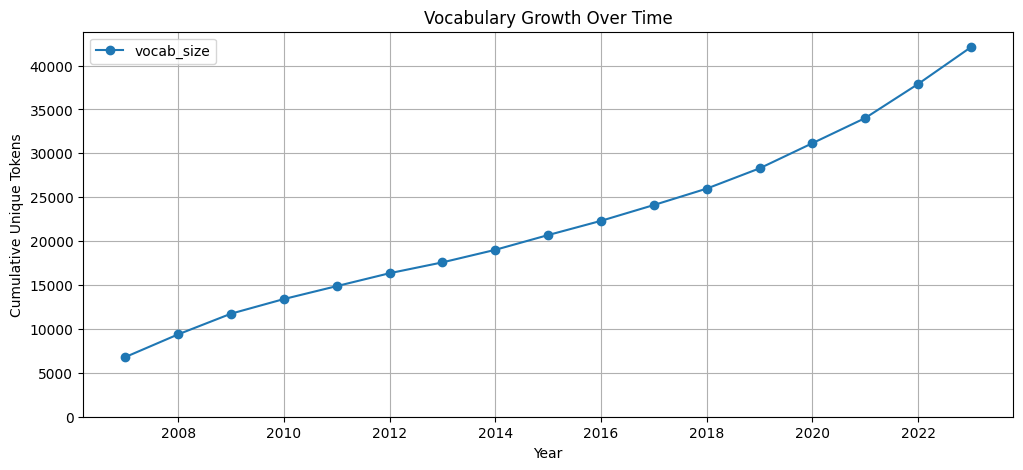

In [36]:
# ----------- Analysis -----------

# Unique tokens per abstract
df_final['unique_tokens_count'] = df_final['final_tokens'].apply(lambda x: len(set(x)))
unique_tokens_per_year = df_final.groupby('year')['unique_tokens_count'].mean()
print("Average unique tokens per abstract per year:\n", unique_tokens_per_year)

unique_tokens_per_year.plot(figsize=(12,5), marker='o')
plt.title('Average Number of Unique Tokens per Abstract Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unique Token Count')
plt.grid(True)
plt.ylim(0)
plt.show()

# Vocabulary growth over time
vocab = set()
vocab_growth = []

for year in sorted(df_final['year'].unique()):
    tokens_year = df_final.loc[df_final['year'] == year, 'final_tokens'].sum()
    vocab.update(tokens_year)
    vocab_growth.append({'year': year, 'vocab_size': len(vocab)})

vocab_growth_df = pd.DataFrame(vocab_growth)

vocab_growth_df.plot(x='year', y='vocab_size', figsize=(12,5), marker='o')
plt.title('Vocabulary Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Unique Tokens')
plt.grid(True)
plt.ylim(0)
plt.show()